<a href="https://colab.research.google.com/github/DuarteVn/profit_prediction/blob/main/Previs%C3%A3o_de_Lucros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Definição do problema



* Base de dados
  * Input (X): Temperatura
  * Output(Y): Lucro diário em dólares
  



# Etapa 1: Importação de Bibliotecas

In [1]:
# %tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
tf.__version__

'2.18.0'

# Etapa 2: Importação da Base de dados

In [3]:
#Permissão para acessar arquivos doo Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Leitura do arquivo csv
profit_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Excel/ice_profit_prediction.csv')
profit_df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [5]:
profit_df.info()
profit_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


# Etapa 3: Visualização da Base de Dados

<Axes: xlabel='Temperature', ylabel='Revenue'>

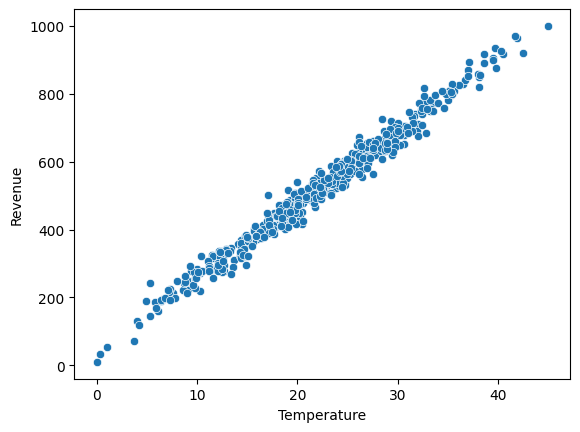

In [6]:
sns.scatterplot(x='Temperature', y='Revenue', data=profit_df)

# Etapa 4: Configuração da base de dados de treinamento

In [7]:
x_train = profit_df['Temperature']
y_train = profit_df['Revenue']

In [8]:
print(x_train.shape)
print(y_train.shape)


(500,)
(500,)


# Etapa 5: Criação e construção do modelo

In [9]:
# # O código abaixo funciona mas o TensorFlow recomenda usar
# o tf.keras.Input() como primeira camada ao usar Sequential() para
# seguir boas práticas do TensorFlow mais "moderno".

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=10 , input_shape=[1]))
model.add(tf.keras.layers.Dense(units=1))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
# model = tf.keras.Sequential([
#     tf.keras.Input(shape=(1,)),
#     tf.keras.layers.Dense(units=10),
#     tf.keras.layers.Dense(units=1)

# ])

# model.summary()

In [11]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss='mean_squared_error')

In [12]:
epochs_hist = model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 207527.6562   
Epoch 2/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22448.6504  
Epoch 3/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5470.7441 
Epoch 4/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1536.1555 
Epoch 5/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 696.4583 
Epoch 6/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 672.0879 
Epoch 7/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 617.6163 
Epoch 8/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 704.7349 
Epoch 9/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 666.8387 
Epoch 10/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 683.3547 
Epoch 11/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 670.5066 
Epoch 12/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 710.2172 
Epoch 13/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 690.3271 
Epoch 14/1000
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 716.6609 
Epoch

# Avaliação do Modelo

In [14]:
epochs_hist.history.keys()

dict_keys(['loss'])

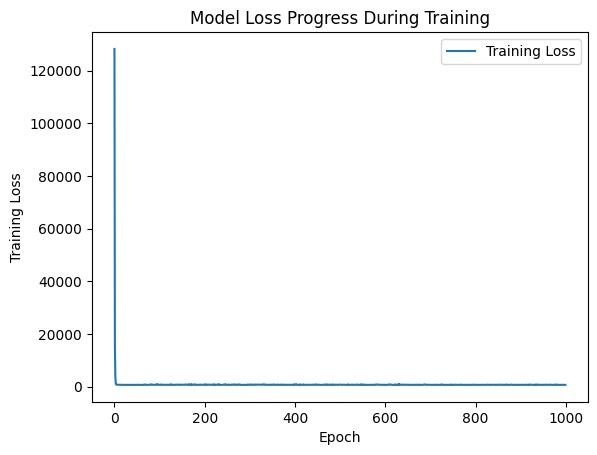

In [15]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [13]:
model.get_weights()

[array([[-6.4470037e-03,  4.8622922e-03,  1.4712624e-03, -6.5641128e-03,
          2.3233520e-02, -2.2941257e-03, -4.4796050e-01,  4.5450120e+00,
         -1.7207094e-02, -1.8043613e-02]], dtype=float32),
 array([ 0.18409257,  0.14011097, -0.10621793, -0.166161  ,  0.5356639 ,
        -0.07313758, -2.854976  ,  6.6812196 ,  1.1484253 , -0.4328061 ],
       dtype=float32),
 array([[ 3.3900910e-04],
        [-8.6807031e-03],
        [ 1.4177947e-03],
        [ 1.0332689e-02],
        [-3.6539555e-02],
        [ 3.4898878e-03],
        [-5.4681236e-01],
        [ 4.6631999e+00],
        [-1.2421301e-02],
        [ 2.8148696e-02]], dtype=float32),
 array([11.705156], dtype=float32)]

In [16]:
#Previsão do Modelo treinado
temp = 5
revenue = model.predict(np.array([temp])) # Convert temp to a NumPy array
print(revenue)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
[[151.56279]]


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Text(0.5, 0, 'Temperature [degC]')

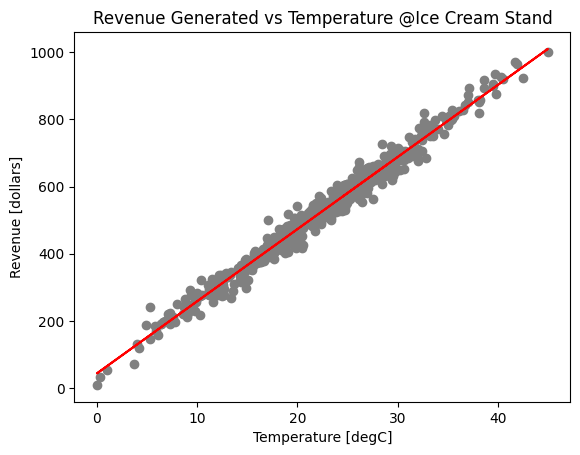

In [17]:
plt.scatter(x_train, y_train, color = 'gray')
plt.plot(x_train, model.predict(x_train), color='red')
plt.title('Revenue Generated vs Temperature @Ice Cream Stand')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')


# Etapa 7: Confirmar os resultados usando Sklearn

In [18]:
x_train.shape

(500,)

In [19]:
# Transforma os dados em um array com N linhas e 1 coluna,
#que é o formato que redes neurais esperam para variáveis de entrada univariadas.
x_train = x_train.values.reshape(-1,1)


In [20]:
x_train.shape

(500, 1)

In [21]:
y_train = y_train.values.reshape(-1,1)

In [22]:
y_train.shape

(500, 1)

In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [26]:
#Coeficiente e BIAS
print("Coeficiente (w):", regressor.coef_)
print("Intercepto (b):", regressor.intercept_)


Coeficiente (w): [[21.44362551]]
Intercepto (b): [44.83126709]


Text(0.5, 0, 'Temperature [degC]')

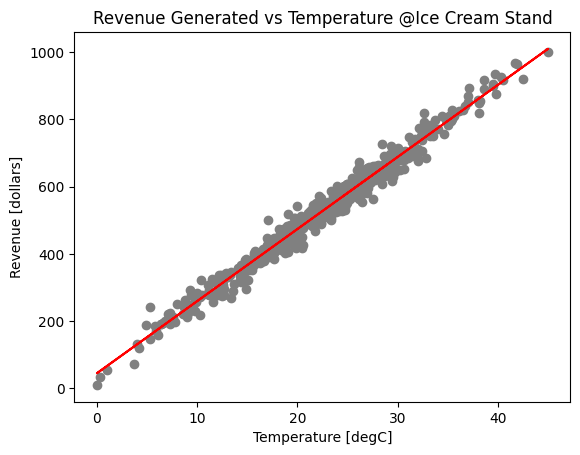

In [27]:
plt.scatter(x_train, y_train, color = 'gray')
plt.plot(x_train, regressor.predict(x_train), color='red')
plt.title('Revenue Generated vs Temperature @Ice Cream Stand')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')

In [30]:
temp = 5
revenue = regressor.predict(np.array([[temp]])) # Convert temp to a NumPy array
print("Revenue Prediction Using Trained ANN", revenue)

Revenue Prediction Using Trained ANN [[152.04939464]]
